In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import math
import datetime

In [2]:
###########################################################################################
####### Assignment 2 Answer Key ~~~~ MV & GH Another of 1,000,000 ways to do this!!########
###########################################################################################

#NOTE: Most of the variable print statements below exit for informative/demonstrative purposes and not functionality.

In [ ]:
#File Open & Variable Assign
dataset = Dataset("/projects/b1045/cmip/CMIP5/NCL_Practice/tas_Amon_CESM1-WACCM_rcp85_r2i1p1_200601-209912.nc")
lats = np.array(dataset.variables['lat'])
tas = np.array(dataset.variables['tas'])

In [3]:
#Making an Array of 96 Cosine Weights based on latitude
#Starting by converting latitude in degrees to radians
#Then multiplying each latitude by its weight to create an array of latitude weights
cos_weights = []
for i in lats:
    m = i * ((math.pi) / 180)
    n = math.cos(m)
    cos_weights.append(n)
weights = np.array(cos_weights)
print(len(lats))
print(len(weights))
print(weights)
#Same Number of weights as there are latitude coordinates

96
96
[6.12323400e-17 3.30633763e-02 6.60905983e-02 9.90455512e-02
 1.31892199e-01 1.64594625e-01 1.97117069e-01 2.29423968e-01
 2.61479995e-01 2.93250098e-01 3.24699410e-01 3.55793795e-01
 3.86499124e-01 4.16781822e-01 4.46608835e-01 4.75947368e-01
 5.04765520e-01 5.33031717e-01 5.60715052e-01 5.87785252e-01
 6.14212718e-01 6.39968551e-01 6.65024588e-01 6.89353429e-01
 7.12928426e-01 7.35723894e-01 7.57714858e-01 7.78877272e-01
 7.99187995e-01 8.18624817e-01 8.37166484e-01 8.54792704e-01
 8.71484239e-01 8.87222819e-01 9.01991232e-01 9.15773332e-01
 9.28554033e-01 9.40319388e-01 9.51056516e-01 9.60753678e-01
 9.69400265e-01 9.76986832e-01 9.83505074e-01 9.88947871e-01
 9.93309266e-01 9.96584493e-01 9.98769969e-01 9.99863305e-01
 9.99863305e-01 9.98769969e-01 9.96584493e-01 9.93309266e-01
 9.88947871e-01 9.83505074e-01 9.76986832e-01 9.69400265e-01
 9.60753678e-01 9.51056516e-01 9.40319388e-01 9.28554033e-01
 9.15773332e-01 9.01991232e-01 8.87222819e-01 8.71484239e-01
 8.54792704e-01 8.

In [4]:
#Multiplying tas(temp values) by weights to get latitude weighted temp values
#You have to reshape the weights array in order to multiply its elements (lat coords) by tas (temp values)
#Redefine tas such that the new latitude-weighted temp values take the original tas values' place
for i in range(len(tas)):
    weighted_tas = weights.reshape((weights.size, 1)) * tas[i]
    tas[i] = weighted_tas
sum_of_weights = np.sum(weights)

In [5]:
#Creating Weighted means for each date (out of 1128)
weighted_means = []
for i in range(len(tas)):
    single_weighted_mean = (np.sum(tas[i])) / (144 * sum_of_weights)
    weighted_means.append(single_weighted_mean)
#Multiply the divisor for the mean by 144 because for each latitude coordinate there are 144 longitude ones.
print(len(weighted_means))
#Now we have 1128 data points--- 1 for each timestep

1128


In [6]:
#Converting From K to C
wma_k = np.array(weighted_means)
wma_c = wma_k - 273.15
weighted_means = wma_c.tolist()
print(wma_k)
print(wma_c)

[286.2811281  286.52558259 287.09677067 ... 291.13174827 290.04779428
 289.38034596]
[13.1311281  13.37558259 13.94677067 ... 17.98174827 16.89779428
 16.23034596]


In [16]:
#Notice the units of time... 
print(dataset.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 2005-01-01 00:00:00
    calendar: noleap
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1128,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [20]:
#Creating a list with all of the 1128 timesteps using the datetime package
#This for loop takes the input 'days since 2005-01-01' and spits out the actual date that would correspond to.
time = dataset.variables['time']
time = np.array(time).tolist()
list_dates = []
origin_date = datetime.date(2005, 1, 1)
for i in time:
    tdelta = datetime.timedelta(days=i)
    data_date = origin_date + tdelta
    list_dates.append(data_date)
print(list_dates)
#Note that '380.5 days since 2005-01-01' is now converted into (2006, 1, 16) for the 0th index, so on so forth...

[datetime.date(2006, 1, 16), datetime.date(2006, 2, 15), datetime.date(2006, 3, 16), datetime.date(2006, 4, 16), datetime.date(2006, 5, 16), datetime.date(2006, 6, 16), datetime.date(2006, 7, 16), datetime.date(2006, 8, 16), datetime.date(2006, 9, 16), datetime.date(2006, 10, 16), datetime.date(2006, 11, 16), datetime.date(2006, 12, 16), datetime.date(2007, 1, 16), datetime.date(2007, 2, 15), datetime.date(2007, 3, 16), datetime.date(2007, 4, 16), datetime.date(2007, 5, 16), datetime.date(2007, 6, 16), datetime.date(2007, 7, 16), datetime.date(2007, 8, 16), datetime.date(2007, 9, 16), datetime.date(2007, 10, 16), datetime.date(2007, 11, 16), datetime.date(2007, 12, 16), datetime.date(2008, 1, 16), datetime.date(2008, 2, 15), datetime.date(2008, 3, 15), datetime.date(2008, 4, 15), datetime.date(2008, 5, 15), datetime.date(2008, 6, 15), datetime.date(2008, 7, 15), datetime.date(2008, 8, 15), datetime.date(2008, 9, 15), datetime.date(2008, 10, 15), datetime.date(2008, 11, 15), datetime.da

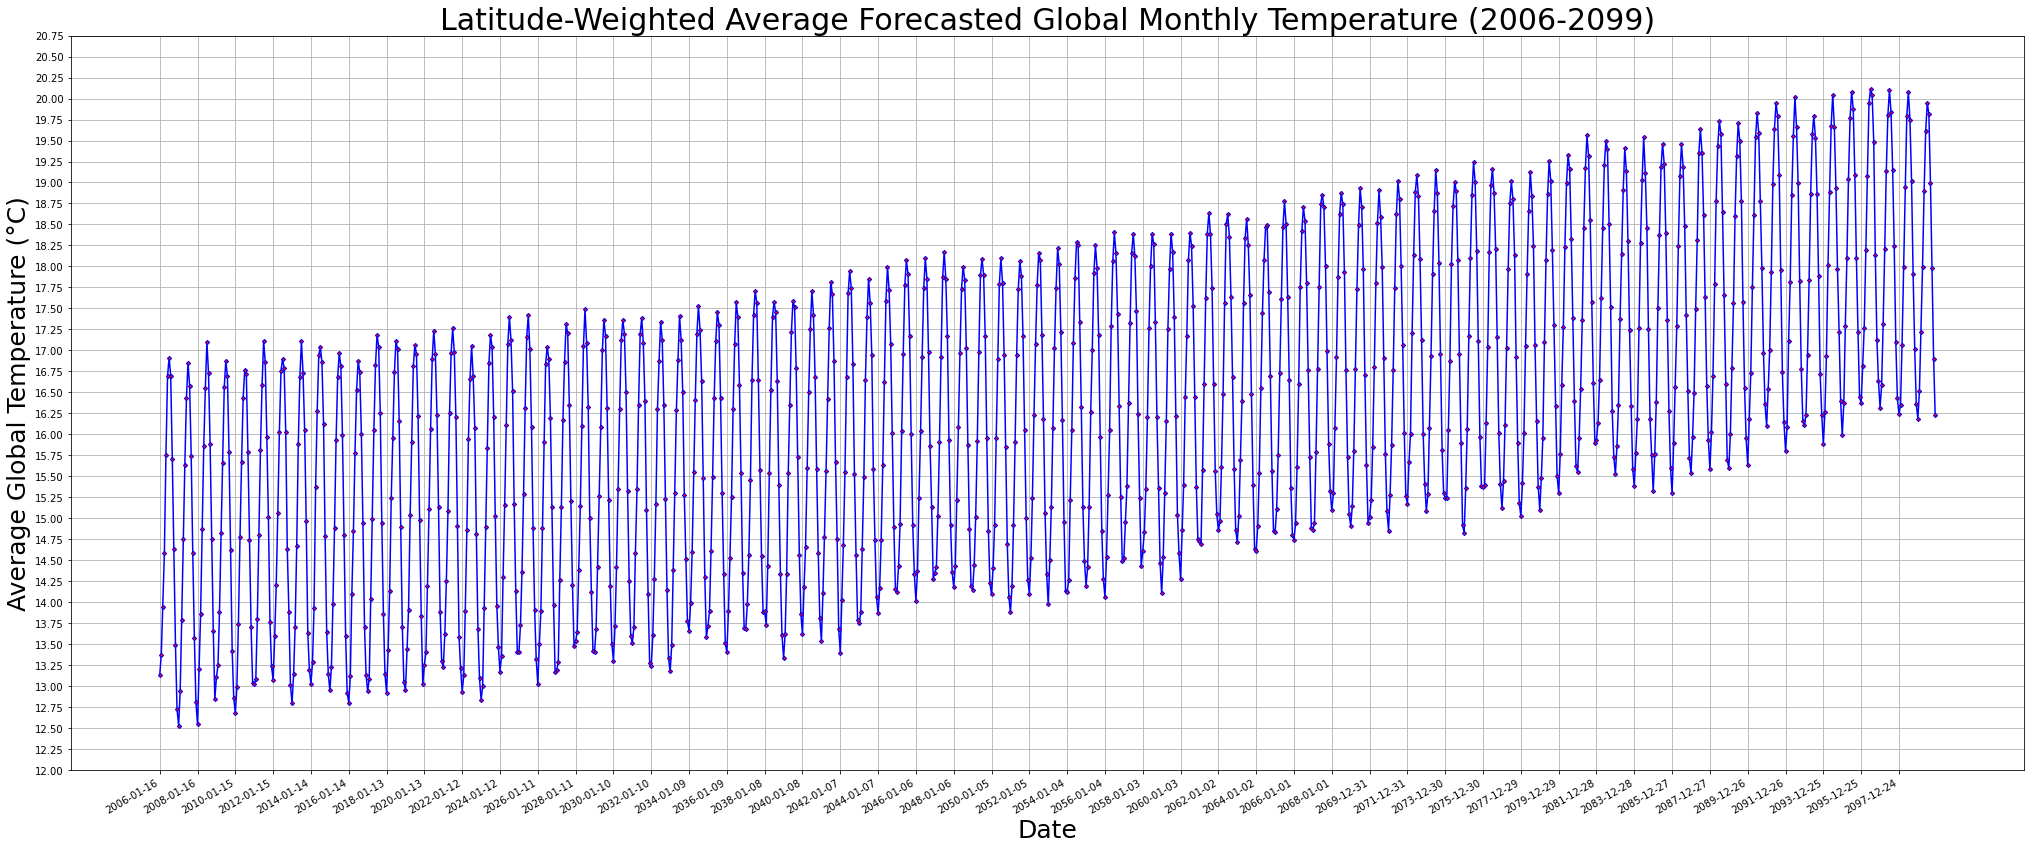

In [15]:
#Creating our first plot
plt.plot(list_dates, weighted_means, 'D', linestyle='-', color='b', markerfacecolor ='r', markersize=3)
plt.xticks(np.arange(min(list_dates), max(list_dates), step=730))
plt.yticks(np.arange(math.floor(min(weighted_means)), math.ceil(max(weighted_means)), step=.25))
plt.gcf().autofmt_xdate()
plt.rcParams['figure.figsize'] = (35, 15)
plt.ylabel('Average Global Temperature (°C)')
plt.xlabel('Date')
plt.rc('axes', labelsize=25)
plt.title('Latitude-Weighted Average Forecasted Global Monthly Temperature (2006-2099)')
plt.rc('axes', titlesize=30)
plt.grid()
plt.savefig('assg2_pt1_bigplot.pdf')
plt.show()

In [9]:
#Creating list of average annual temperature
avg_yearly_temp = []
for i in range(0, 94):
    yearly_avg = sum(weighted_means[(12 * i):(12 * (i + 1))]) / 12
    avg_yearly_temp.append(yearly_avg)

In [10]:
#Creating 2006-2035 Baseline temp. avg.
num_years = 2036 - 2006
baseline_list = avg_yearly_temp[:num_years]
baseline = sum(baseline_list) / len(baseline_list)
#2036-2006 because index is non-inclusive of last number, meaning we need to add one more year (2035 +1) to account for it.

In [11]:
#Creating our temp anomaly list
temp_anomalies = []
for i in avg_yearly_temp:
    single_anomaly = i - baseline
    temp_anomalies.append(single_anomaly)
print(len(temp_anomalies))
#Notice there are 94 temp anomaly elements-- one for each year

94


In [12]:
#Creating our list of all 94 years for x-axis of temp anomaly plot
year_list = []
for i in range(2006, 2100):
    year_list.append(i)
print(len(year_list))
#Same dimensions as temp-anomalies list

94


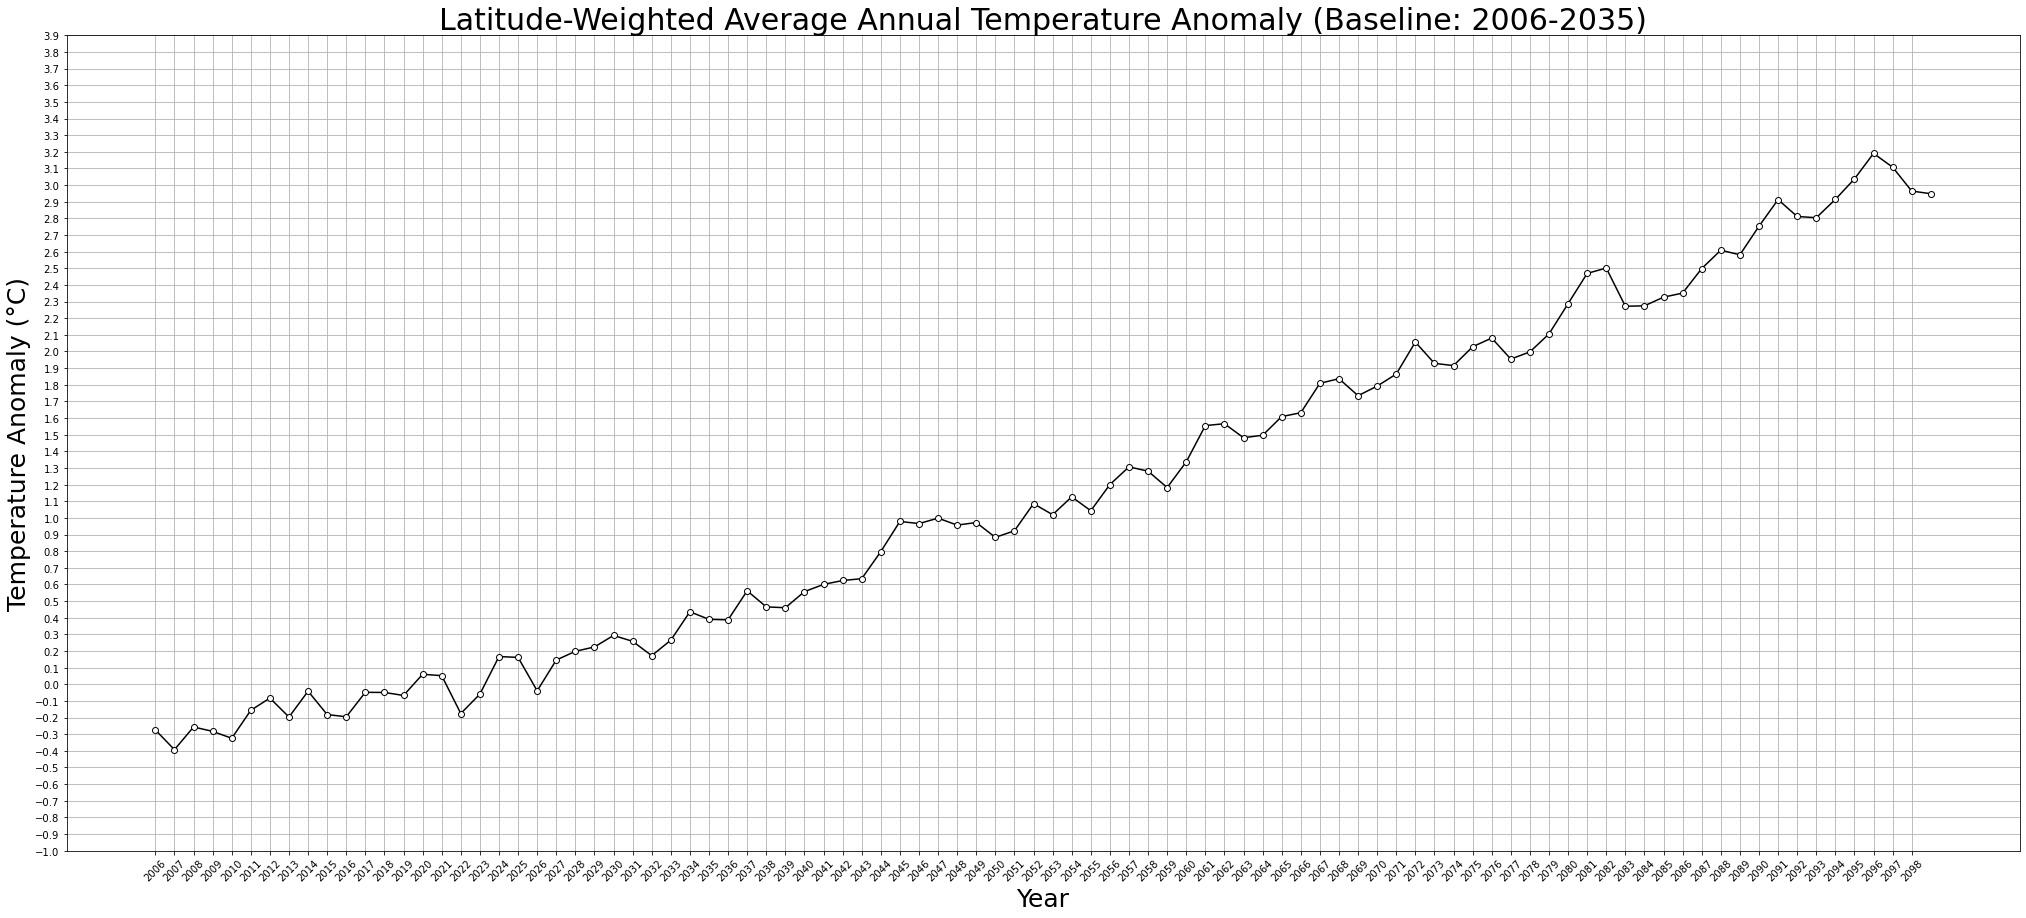

In [13]:
#Creating our temp anomaly plot
plt.plot(year_list, temp_anomalies, 'o', linestyle='-', color = 'k', markerfacecolor='w')
plt.xticks(np.arange(min(year_list), max(year_list), step=1), rotation=45)
plt.yticks(np.arange(-1, 4, step=0.1))
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Latitude-Weighted Average Annual Temperature Anomaly (Baseline: 2006-2035)')
plt.grid()
plt.savefig('assg2_pt2_bigplot.pdf')
plt.show()

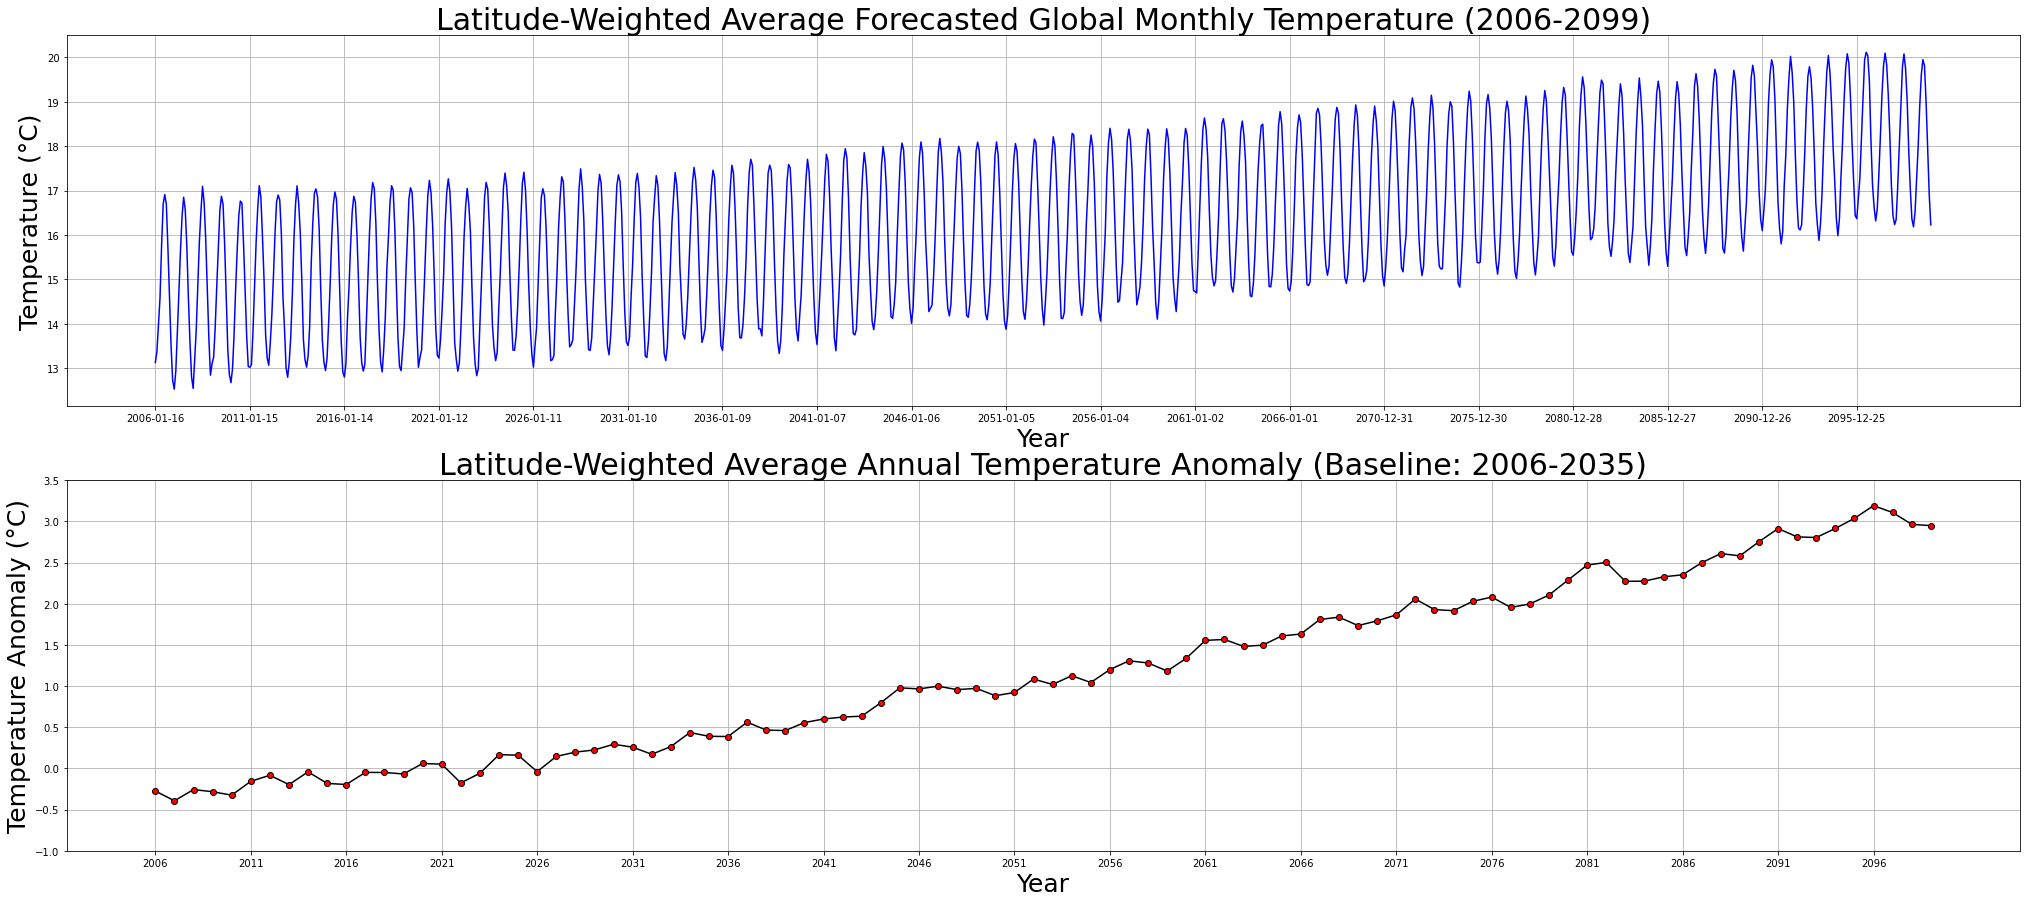

In [14]:
#Creation of subplots! Woo!
fig, axs = plt.subplots(2, 1)
axs[0].plot(list_dates, weighted_means, linestyle='-', color='b')
axs[0].set_xlabel('Year')
axs[0].set_xticks(np.arange(min(list_dates), max(list_dates), step=1825))
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_title('Latitude-Weighted Average Forecasted Global Monthly Temperature (2006-2099)')
axs[0].grid()

axs[1].plot(year_list, temp_anomalies, 'o', linestyle='-', color = 'k', markerfacecolor='r')
axs[1].set_xticks(np.arange(min(year_list), max(year_list), step=5))
axs[1].set_yticks(np.arange(-1, 4, step=0.5))
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Temperature Anomaly (°C)')
axs[1].set_title('Latitude-Weighted Average Annual Temperature Anomaly (Baseline: 2006-2035)')
axs[1].grid()
plt.savefig('assg2_subplots.pdf')
plt.show()
